In [1]:
import Parity_Data_Generator
import numpy as np
from pyESN import ESN
import time
from matplotlib import pyplot as plt

N = 7000   # number of datapoints
n = 3       # n-parity
rng = np.random.RandomState(42)

def runSomeConfigs(spectral_rad, leak_r, train_bits, test_bits, train_parity, test_parity):
#     print("Spectral-radius:",spectral_rad, "leak-rate:", leak_r)
    nParityESN = ESN(n_inputs=1,
                          n_outputs=1,
                          n_reservoir=500,  # from 200 onwards test error decreases significantly
                          spectral_radius=spectral_rad,  # high spectral rad is better (high fluctuations 0->1->0)
                          leak_rate= leak_r,   # adjust leak_rate
                          sparsity=0.95,
                          noise=0.01,
                          input_shift=0,
                          input_scaling=3,  # 3 seems to be fine. Maybe use lower
                          teacher_forcing=False,
                          teacher_scaling=1.12,
                          teacher_shift=-0.7,
                          out_activation=np.tanh,
                          inverse_out_activation=np.arctanh,
                          random_state=rng,
                          silent=False)
    # print(np.shape(bits),np.shape(parity),np.shape(target))
    nParityESN.fit(train_bits, train_parity, inspect=True)
    pred_test = nParityESN.predict(test_bits)

    #### not rounding
    predictedParity = pred_test # not rounding
    #### Rounding
#     better_pred_test = []           # Maybe don't round and return "true" results from pred_test
#     for x in pred_test:
#         better_pred_test.append(0 if x < 0.5 else 1)
#     predictedParity = np.array(better_pred_test).reshape(-1,1)
#     print(test_parity[40030:40100].reshape(-1))
#     print(predictedParity[40030:40100].reshape(-1))
    
    print("Testing error")
    test_error = np.sqrt(np.mean((predictedParity - test_parity) ** 2))
    print(test_error)
    return test_error

def produceTrainingData(randomState):
    bits, parity, target = Parity_Data_Generator.generateParityData(N, n, randomstate=np.random.RandomState(randomState))

    # Divide in training and test data
    traintest_cutoff = int(np.ceil(0.7 * len(bits)))
    train_bits, test_bits = bits[:traintest_cutoff], bits[traintest_cutoff:]
    train_parity, test_parity = parity[:traintest_cutoff], parity[traintest_cutoff:]
#     train_targets, test_targets = target[:traintest_cutoff], target[traintest_cutoff:]
    return train_bits, test_bits, train_parity, test_parity

# trials = 1
n = 500
# l_rate = np.linspace(0.1, 1, num=10)
# l_rate =[0.1]
l_rate = [0.1,0.9]
# sp_rad = np.linspace(0.9, 1.0, num=5)
# sp_rad = np.linspace(0.1, 1, num=10)
# sp_rad = [0.9,0.92,0.94,0.96,0.98, 1]
sp_rad = [0.1,0.9]

run_time = time.time()
iterations, iterationcount = trials*len(sp_rad)*len(l_rate), 0
errors = []
all_errors = [{} for _ in range(trials)] # empty dict
for i in range(trials):
    errors = []
    # produce training and testing data
    train_bits, test_bits, train_parity, test_parity = produceTrainingData(i)
    
    for l in l_rate:
        for s in sp_rad:
            print("Neurons:", n, "Leak-rate:", l, "Spectral-radius:", s)
            errors.append(runSomeConfigs(s,l, train_bits, test_bits, train_parity, test_parity))
            iterationcount = iterationcount + 1
            print("--- Progress: {:.2f}% --- {:.2f} minutes ---".format(iterationcount/iterations*100, ((time.time() - run_time)/60) ))
    ## Save leak-rate,spectral-radius and error in dictionary
    all_errors[i] = errors
            
print("Total time for Testbench:")
print("--- {:.2f} seconds ---".format(time.time() - run_time))
print("--- {:.2f} minutes ---".format(((time.time() - run_time)/60)))

In [2]:
train_bits, test_bits, train_parity, test_parity = produceTrainingData(42)

harvesting states...
fitting...


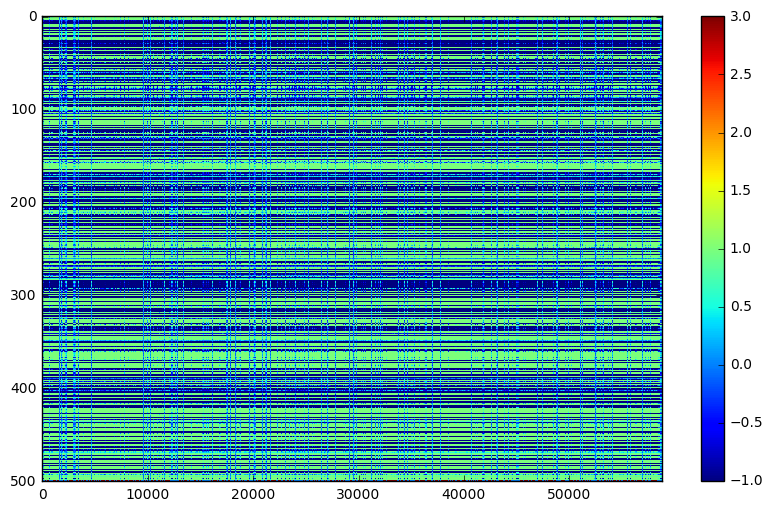

training error:
0.290693802932
Testing error
0.29350077953


0.2935007795298567

In [3]:
l_rate = 0.1
sp_rad = 0.1
runSomeConfigs(sp_rad,l_rate, train_bits, test_bits, train_parity, test_parity)

harvesting states...
fitting...


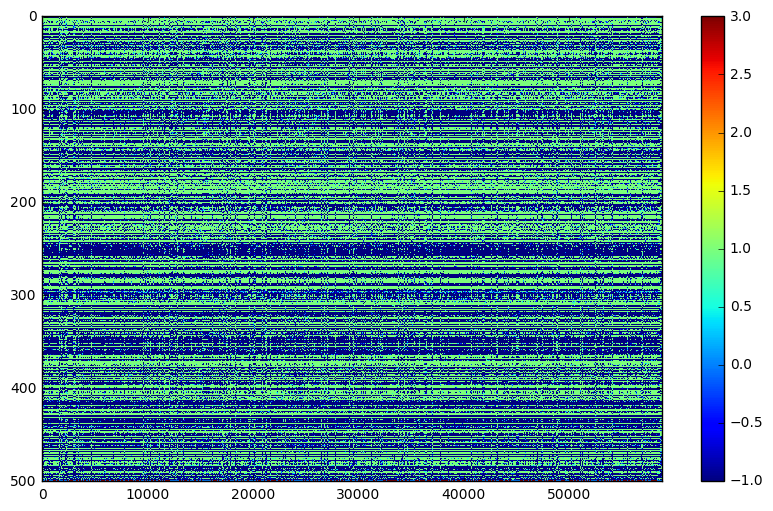

training error:
0.282649164253
Testing error
0.296158468915


0.29615846891464681

In [4]:
l_rate = 0.1
sp_rad = 0.9
runSomeConfigs(sp_rad,l_rate, train_bits, test_bits, train_parity, test_parity)

harvesting states...
fitting...


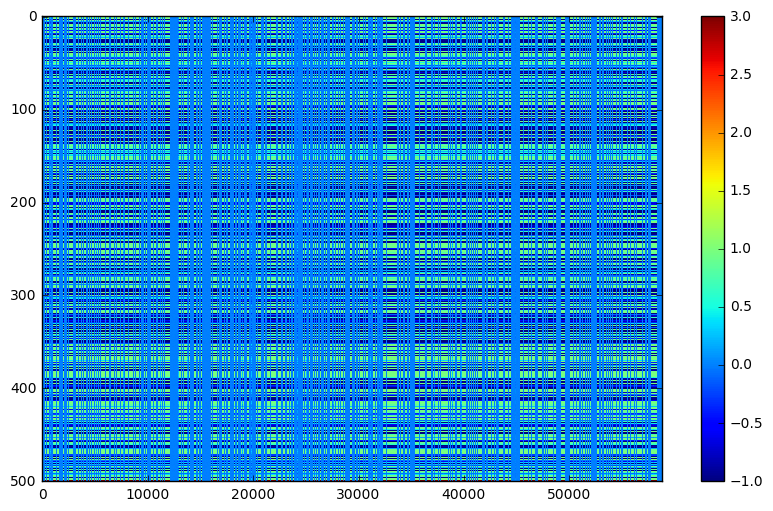

training error:
0.505958554788
Testing error
0.508895542708


0.50889554270789117

In [5]:
l_rate = 0.9
sp_rad = 0.1
runSomeConfigs(sp_rad,l_rate, train_bits, test_bits, train_parity, test_parity)

harvesting states...
fitting...


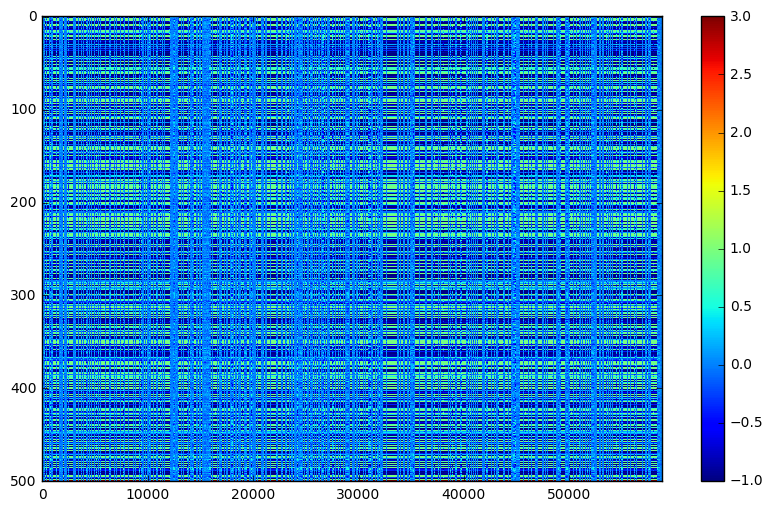

training error:
0.456843119166
Testing error
0.458804168589


0.45880416858885215

In [6]:
l_rate = 0.9
sp_rad = 0.9
runSomeConfigs(sp_rad,l_rate, train_bits, test_bits, train_parity, test_parity)

harvesting states...
fitting...


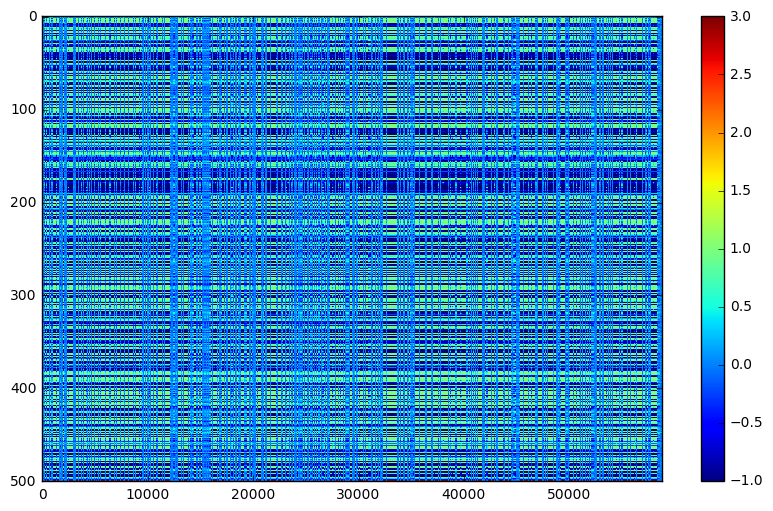

training error:
0.448646097846
Testing error
0.451126180023


0.45112618002291849

In [7]:
l_rate = 0.5
sp_rad = 0.5
runSomeConfigs(sp_rad,l_rate, train_bits, test_bits, train_parity, test_parity)